In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Description.

column name in cleaned df | meaning 
--- | --- 
**customer** | Customer ID
**state** | US State 
**customer_lifetime_value** | CLV is the client economic value for a company during all their relationship
**response** | Response to marketing calls (customer engagement)
**coverage** | Customer coverage type
**education** | Customer education level
**effective_to_date** | Effective to date
**employmentstatus** | Customer employment status
**gender** | Customer gender
**income** | Customer income
**location_code** | Customer living zone
**marital_status:** | Customer marital status
**monthly_premium_auto:** | Monthly premium
**months_since_last_claim:** | Last customer claim
**months_since_policy_inception:** | Policy Inception
**number_of_open_complaints:** | Open claims
**number_of_policies:** | Number policies
**policy_type:** | Policy type
**policy:** | Policy
**renew_offer_type:** | Renew
**sales_channel:** | Sales channel (customer-company first contact)
**total_claim_amount:** | Claims amount
**vehicle_class:** | Vehicle class
**vehicle_size:** | Vehicle siz

**Goal: Can we predict the amount claimed by a customer in our data set?**

# Fetch data 

In [126]:
!ls

Correlation_Distribution_Multicollinearity-penguins.ipynb
Correlation_Distribution_Multicollinearity.ipynb
Cust_anal_LR.ipynb
Customer_Analysis_Linear_Regression - Jupyter Notebook.pdf
Customer_Analysis_Linear_Regression.ipynb
HealthcareforallEDA_14Apr.ipynb
Strokes-initial.ipynb
diabetes.csv
file1.csv
file2.csv
file3.csv
labcustomer_round3.ipynb
marketing_customer_analysis.csv
penguins.csv
qanda_custanal_round1.ipynb
sian_1_4_EDA_pandas 2.ipynb
strokes_data.csv
web_data.csv
webdata_datetime.ipynb


In [127]:
df=pd.read_csv('marketing_customer_analysis.csv')

In [128]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [129]:
pd.set_option('display.max_columns',None)

# Cleaning and wrangling data 

In [130]:
df.shape

(9134, 24)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [132]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [133]:
#list comprehension to standardise headers 
df.columns=[h.lower().replace(' ','_') for h in df.columns]

In [134]:
df.rename(columns={'employmentstatus': 'employment_status'},
          inplace=True, errors='raise')
# rename specific column / columns 

# drop some irrelevant columns  

In [135]:
df=df.drop(columns=['customer','sales_channel']) # drop customer id because its unique 
# drop sales channel - feels irrelevant 

# Exploration of data EDA 

In [136]:
# how many unique values in each column 
for c in df.columns:
    print(c, len(df[c].unique()))

state 5
customer_lifetime_value 8041
response 2
coverage 3
education 5
effective_to_date 59
employment_status 5
gender 2
income 5694
location_code 3
marital_status 3
monthly_premium_auto 202
months_since_last_claim 36
months_since_policy_inception 100
number_of_open_complaints 6
number_of_policies 9
policy_type 3
policy 9
renew_offer_type 4
total_claim_amount 5106
vehicle_class 6
vehicle_size 3


In [137]:
# lets pick one column to look at 
df['marital_status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

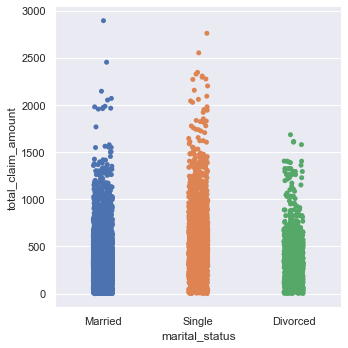

In [138]:
sns.catplot(x='marital_status', y="total_claim_amount", data=df);

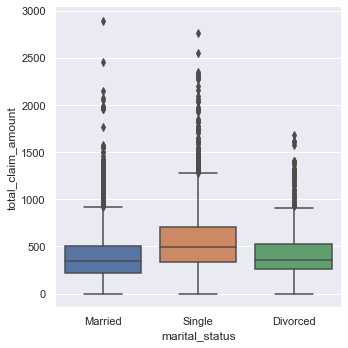

In [139]:
sns.catplot(x='marital_status', y="total_claim_amount", kind='box',data=df);

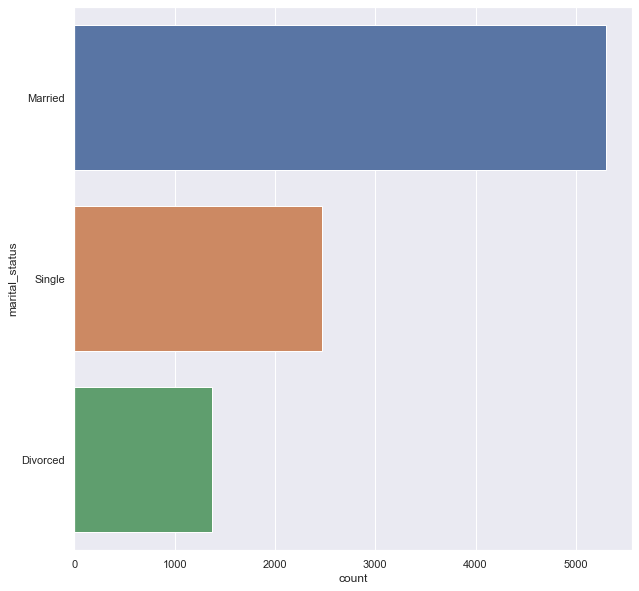

In [140]:
sns.countplot(y=df['marital_status']);

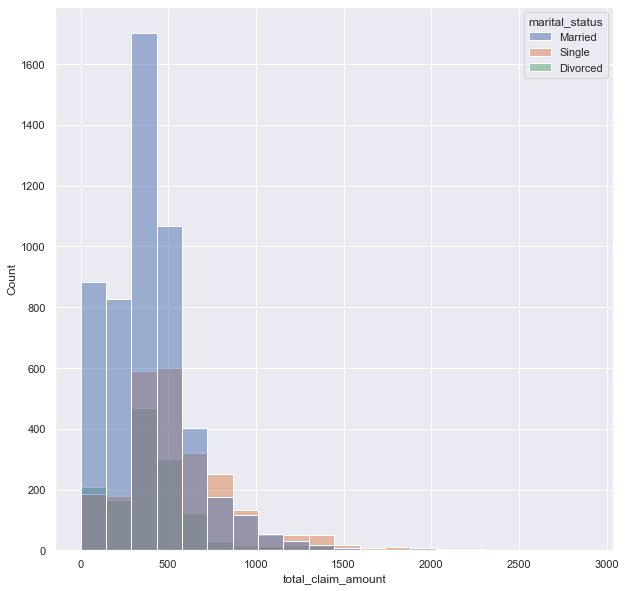

In [141]:
sns.histplot(x='total_claim_amount',hue='marital_status',bins=20,data=df);

In [142]:
df['marital_status'].describe()

count        9134
unique          3
top       Married
freq         5298
Name: marital_status, dtype: object

In [143]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [144]:
summary=df.groupby('marital_status')['total_claim_amount'].mean()

In [145]:
summary

marital_status
Divorced    403.704718
Married     384.517033
Single      557.407396
Name: total_claim_amount, dtype: float64

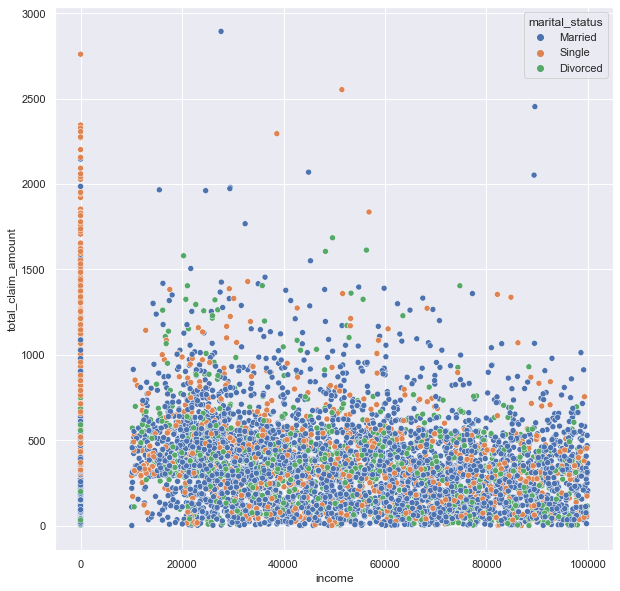

In [146]:
sns.scatterplot(data=df, x='income', y='total_claim_amount', hue='marital_status');

# Create subsets of columns - cat and num 

In [185]:
df_num=df.select_dtypes(exclude=object) #or include include=np.number
#optional _get_numeric_data
df_cat=df.select_dtypes(include=object)

In [186]:
df_num.shape

(9134, 8)

In [187]:
df_cat.shape

(9134, 14)

# Visualise numeric columns

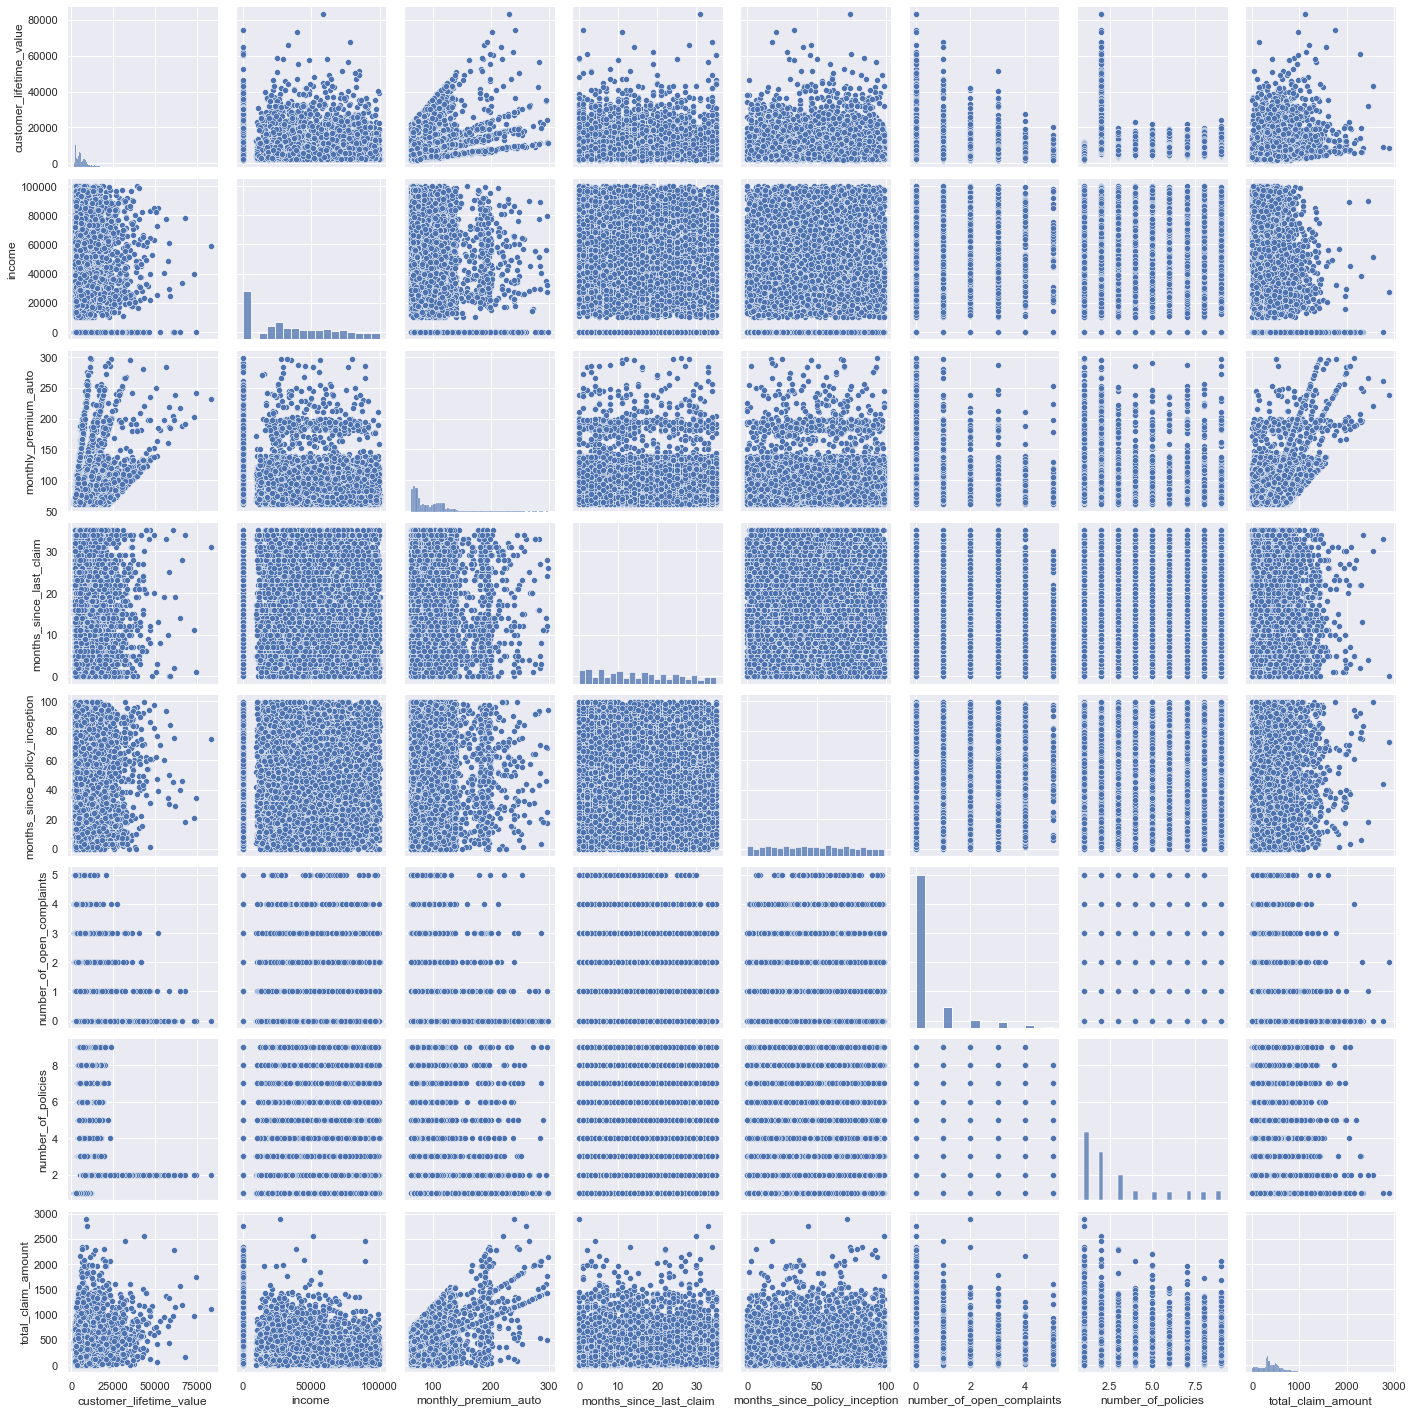

In [150]:
sns.pairplot(df_num);

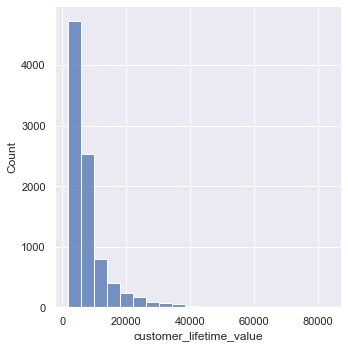

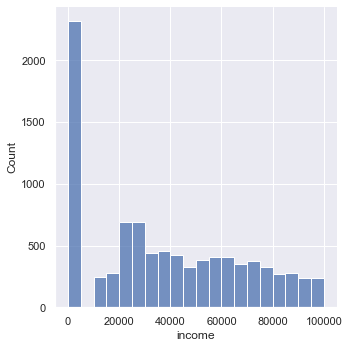

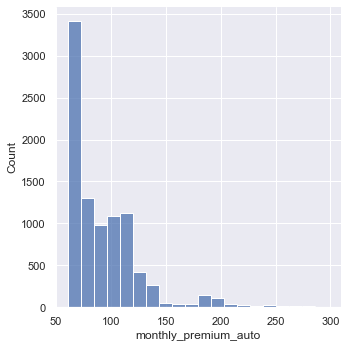

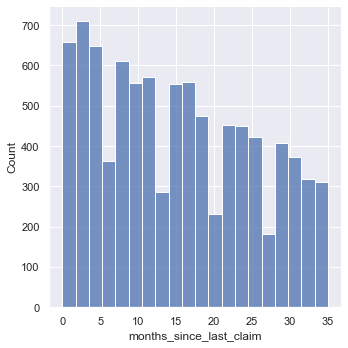

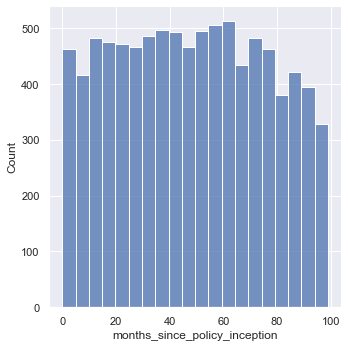

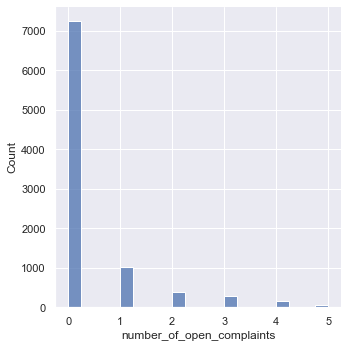

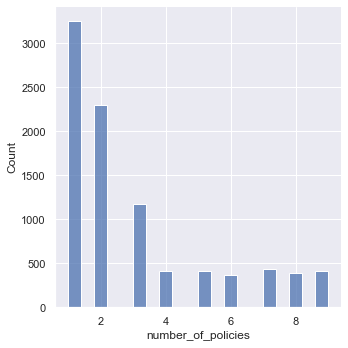

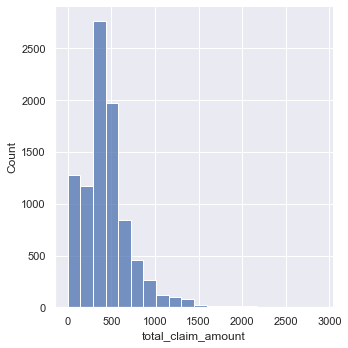

In [151]:
for col in df_num.columns:
    sns.displot(df_num[col],bins=20)
    plt.show()

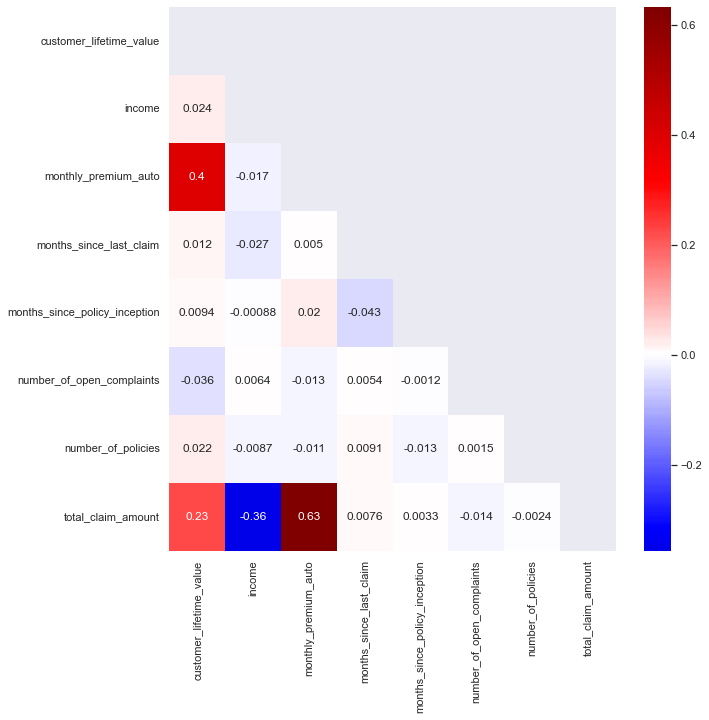

In [152]:
# correlation matrix heatmap 
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True
sns.heatmap(df.corr(),mask=mask, annot=True,cmap='seismic',center=0);

In [153]:
# if its too small 
sns.set(rc = {'figure.figsize':(10,10)})
#<--responsible for changing the size of a seaborn plot

**Lunchbreak**

# Pre processing the data - numeric columns first 

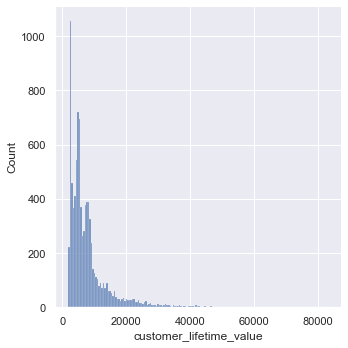

In [154]:
sns.displot(df['customer_lifetime_value'])

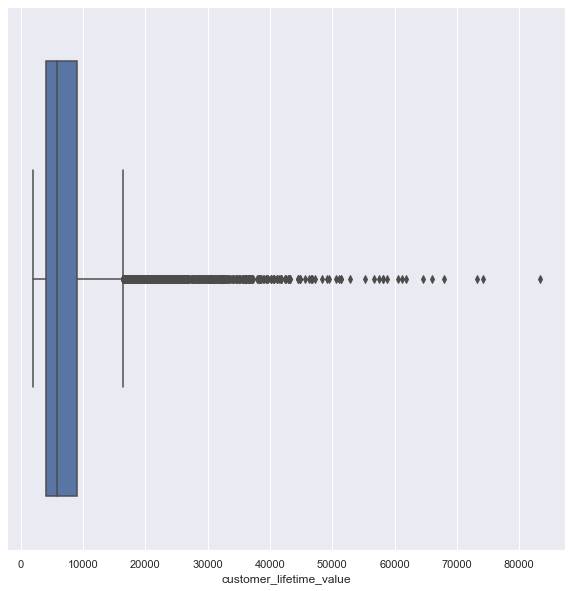

In [155]:
sns.boxplot(x=df['customer_lifetime_value']);

## outliers detection and removal

** process to identify outliers **
- find the percentile 25 and 75 
- calculate the IQR (ie diff beftween 25 and 75)
- limits - any rows under or over the limit = OUTLIERS
- could also set your own limits 

In [156]:
q1=np.percentile(df['customer_lifetime_value'],25)

In [157]:
q1

3994.25179425

In [158]:
q3=np.percentile(df['customer_lifetime_value'],75)

In [159]:
q3

8962.16704125

In [160]:
iqr=q3-q1

In [161]:
upper_boundary=q3+(1.5*iqr)
lower_boundary=q1-(1.5*iqr)

In [162]:
len(df[df['customer_lifetime_value']<lower_boundary])

0

In [163]:
len(df[df['customer_lifetime_value']>upper_boundary])

817

In [164]:
# remember to drop whole row if removing outliers!!

In [165]:
# or hard code the limits 
#example "anything over 50k is an outlier"
len(df[df['customer_lifetime_value']>50000])

20

In [166]:
df[df['customer_lifetime_value']>50000]

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,total_claim_amount,vehicle_class,vehicle_size
79,California,58166.55351,No,Basic,Bachelor,2/27/11,Employed,M,61321,Rural,Single,186,0,30,1,2,Personal Auto,Personal L3,Offer2,427.631210,Luxury Car,Small
1974,Washington,74228.51604,No,Extended,High School or Below,1/26/11,Unemployed,M,0,Suburban,Single,242,1,34,0,2,Personal Auto,Personal L1,Offer1,1742.400000,Luxury Car,Medsize
2190,California,51337.90677,No,Premium,College,2/24/11,Employed,F,72794,Rural,Single,164,3,47,1,2,Personal Auto,Personal L2,Offer1,50.454459,SUV,Large
2908,Arizona,58753.88046,No,Premium,Bachelor,1/6/11,Employed,F,24964,Suburban,Married,185,0,84,0,2,Personal Auto,Personal L2,Offer2,888.000000,SUV,Medsize
3145,Nevada,52811.49112,No,Basic,Bachelor,1/8/11,Unemployed,M,0,Suburban,Married,182,8,70,0,2,Corporate Auto,Corporate L2,Offer2,873.600000,Luxury Car,Small
3760,Oregon,61850.18803,No,Extended,College,2/4/11,Unemployed,F,0,Suburban,Married,238,19,29,0,2,Personal Auto,Personal L1,Offer3,1142.400000,Luxury SUV,Medsize
4126,Arizona,60556.19213,No,Extended,College,1/1/11,Unemployed,F,0,Suburban,Married,204,35,45,0,2,Personal Auto,Personal L3,Offer1,979.200000,Luxury SUV,Large
4915,Oregon,56675.93768,No,Premium,College,1/24/11,Employed,F,77237,Suburban,Married,283,33,93,0,2,Personal Auto,Personal L1,Offer4,1358.400000,Luxury SUV,Medsize
5279,Washington,66025.75407,No,Basic,Bachelor,2/22/11,Employed,M,33481,Suburban,Single,188,28,46,0,2,Personal Auto,Personal L3,Offer1,1194.892002,Luxury SUV,Medsize
5716,Oregon,83325.38119,No,Extended,High School or Below,1/31/11,Employed,M,58958,Suburban,Married,231,31,74,0,2,Personal Auto,Personal L3,Offer1,1108.800000,Luxury Car,Small


## power transformation 

log transform - np.log() - cannot log transform a null - error 
- make copy of column
- create a log transform function 
- apply to the column 
- visualise the distribution afterwards

In [168]:
def log_transform(x):
    x=np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0 

In [169]:
#create a copy of the column in isolation 
clv_1=list(map(log_transform,df['customer_lifetime_value']))

In [170]:
# side note : map(arg1 = process, arg2 = object)

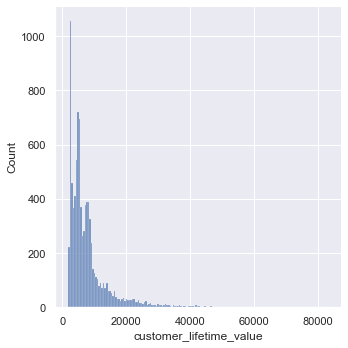

In [171]:
sns.displot(df['customer_lifetime_value']);

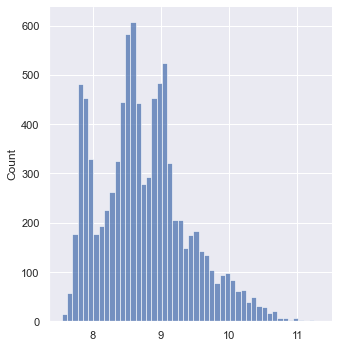

In [172]:
sns.displot(clv_1);

## Scaling 

In [173]:
from sklearn.preprocessing import MinMaxScaler as mms

In [ ]:
#scale one column only - eg cust lifetime value

df['customer_lifetime_value']=mms().fit_transform(df['customer_lifetime_value'].values.reshape(-1, 1))

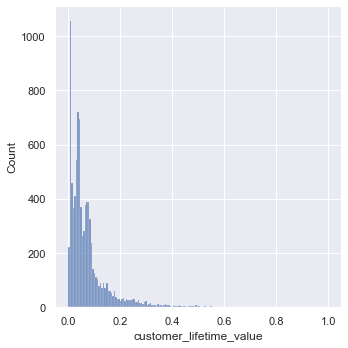

In [175]:
sns.displot(df['customer_lifetime_value']);

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective_to_date              9134 non-null   datetime64[ns]
 6   employment_status              9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   int64         
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premium_a

### scale all numerical columns 

In [188]:
df_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [183]:
# suppress warning messages 
import warnings
warnings.filterwarnings('ignore')

In [190]:
# apply scaler to all num columns except target 
for c in df_num.columns[:-2]:
    df_num[c]=mms().fit_transform(df_num[c].values.reshape(-1,1))

In [191]:
df_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,1,384.811147
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,8,1131.464935
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,2,566.472247
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,7,529.881344
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,1,138.130879


In [182]:
df_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,384.811147
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,1131.464935
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,566.472247
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,529.881344
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,138.130879


## categories 

In [228]:
df_cat.columns

Index(['state', 'response', 'coverage', 'education', 'employment_status',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [193]:
# drop effective to date ( could return to this later potentially)
df_cat=df_cat.drop(columns=['effective_to_date'])

options for encoding object columns 

* OHE = one hot encoder
-OR-
* pd get_dummies 

In [195]:
df_cat_enc=pd.get_dummies(df_cat)

In [197]:
df_cat_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 53 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   state_Arizona                    9134 non-null   uint8
 1   state_California                 9134 non-null   uint8
 2   state_Nevada                     9134 non-null   uint8
 3   state_Oregon                     9134 non-null   uint8
 4   state_Washington                 9134 non-null   uint8
 5   response_No                      9134 non-null   uint8
 6   response_Yes                     9134 non-null   uint8
 7   coverage_Basic                   9134 non-null   uint8
 8   coverage_Extended                9134 non-null   uint8
 9   coverage_Premium                 9134 non-null   uint8
 10  education_Bachelor               9134 non-null   uint8
 11  education_College                9134 non-null   uint8
 12  education_Doctor                 9134 non-null  

## bring the data frame back together 

In [201]:
# check the shape 
print(df_num.shape) 
print('numbers and ')
print(df_cat_enc.shape)
print('categories')

(9134, 8)
numbers and 
(9134, 53)
categories


In [202]:
df_full=pd.concat([df_num,df_cat_enc],axis=1)

## define X and y

In [204]:
X=df_full.drop(columns=['total_claim_amount'])
y=df_full['total_claim_amount']

## import and apply model 

- go to sklearn and select correct model 
- define any hyper parameters 
- split the data into train and test 
- train the model on the training data 
- test the model on the test data 
- evaluate the model 

In [206]:
from sklearn.linear_model import LinearRegression as Lin

In [207]:
from sklearn.model_selection import train_test_split as tts

In [208]:
# define the model 
linreg=Lin()

In [209]:
# split the data into TT 
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=40)

In [210]:
# train the model on train 
linreg.fit(X_train,y_train)

LinearRegression()

In [211]:
#make some predictions on test 
y_pred=linreg.predict(X_test)

### for demonstration only 

In [212]:
y_test.head(10)

554     451.200000
1825    355.200000
218     537.600000
7261    274.114843
3858    302.400000
5600    556.800000
7570    331.200000
8767    502.873215
4409    336.000000
7145    321.600000
Name: total_claim_amount, dtype: float64

In [215]:
y_pred_df=pd.DataFrame(y_pred)

In [216]:
y_pred_df.head(10)

,0
0,578.729934
1,413.939767
2,634.782407
3,171.175035
4,328.101449
5,620.855224
6,457.965427
7,540.042117
8,539.184459
9,405.716778


## compare and evaluate 

In [219]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import mean_absolute_error as mae 

In [220]:
r2(y_test,y_pred)

0.7720539720803095

In [221]:
mse(y_test,y_pred)

19824.062634426773

In [222]:
mae(y_test,y_pred)

95.87584780275424

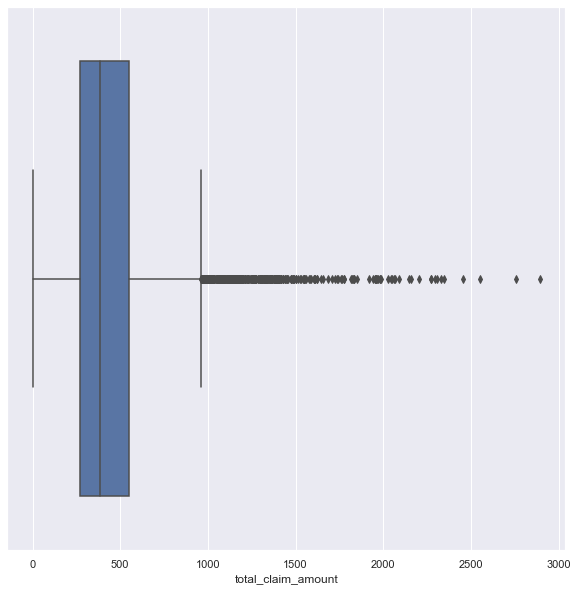

In [223]:
sns.boxplot(x=df['total_claim_amount']);